In [52]:
# A Wrapper Function to Calculate Pearson Correlation Confidence Interval in Python

In [53]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
 
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.stats import spearmanr,pearsonr
import sys
from math import log10
dir_ ='data'

In [55]:
NPX_data =  pd.read_excel(open(os.path.join(dir_,'20191510_Buckwalter_NPX.xlsx'),'rb'), sheet_name='NPX_Data', usecols = 'A:AUA',skiprows=5)
NPX_panel_type = pd.read_excel(open(os.path.join(dir_,'20191510_Buckwalter_NPX.xlsx'),'rb'), sheet_name='NPX_Data', usecols = 'A:AUA',nrows=4).transpose()
#NPX_data = NPX_data[pd.notnull(NPX_data['OlinkID'])]
#print(NPX_data['OlinkID'])
NPX_data['sel'] =NPX_data['OlinkID'].apply(lambda x:1 if str(x)[len(str(x))-2:]=='-0' else 0)
NPX_data = NPX_data[NPX_data['sel']==1]
NPX_data = NPX_data.drop('sel', axis=1)
NPX_data['OlinkID']= NPX_data['OlinkID'].apply(lambda x:x[:-2] if str(x)[len(str(x))-2:]=='-0' else x)
NPX_data = NPX_data.rename(columns={'OlinkID':'pid'})
NPX_data['pid'] = NPX_data['pid'].apply(lambda x:int(x))


In [56]:
ocols = [col for col in NPX_data.columns if 'OID' in col]
ocols.append('pid')
NPX_data = NPX_data[ocols]
#NPX_data = NPX_data.dropna(axis=1)
#NPX_data.info()

In [57]:
NPX_data = NPX_data.dropna(axis=1)
#NPX_data.info()

In [58]:
protein_names = pd.read_excel(open(os.path.join(dir_,'20191510_Buckwalter_NPX.xlsx'),'rb'), sheet_name='NPX_Data', usecols = 'A:AUA', skiprows=1, nrows=5).transpose()
new_header = protein_names.iloc[0] #grab the first row for the header
protein_names = protein_names[1:] #take the data less the header row
protein_names.columns = new_header
protein_names = protein_names.dropna(subset = ['Assay','OlinkID'], axis=0)
#len(protein_names[['Assay','OlinkID']])

In [59]:
pr_dic = dict(zip(protein_names.Assay,protein_names.OlinkID)) 

In [60]:
patient_data = pd.read_excel(open(os.path.join(dir_,'StrokeCog_20200128_Restructured.xlsx'),'rb'), sheet_name='StrokeCog_RedCap_20200128_Olink', usecols = 'A:ML', skiprows=1)
#updated_patient_data['study_id']
#patient_data.head()

In [61]:
patient_data['study_id'] = patient_data['study_id'].apply(lambda x: x[5:])
patient_data = patient_data.rename(columns={'study_id': 'pid'})
patient_data = patient_data.rename(columns={'Stroke_size':'size','demo_gender':'gender', 'nihss_total':'nihss', 'online_hhist_diabtype':'diabtype', 'online_hhist_hf':'CHF', 'online_hhist_valverepl':'hvalve', \
'online_hhist_pd':'Parkinsons', 'online_hhist_seiz':'seizure', 'online_hhist_dementia':'dementia','strokeToBattery_days.event_0_baseline':'timesince', \
'battery_age.event_0_baseline':'age', 'sis1_transformed_score.event_0_baseline':'sis1', 'sis2_transformed_score.event_0_baseline':'sis2', \
'sis3_transformed_score.event_0_baseline':'sis3', 'sis4_transformed_score.event_0_baseline':'sis4',\
'sis5_transformed_score.event_0_baseline':'sis5', 'sis6_transformed_score.event_0_baseline':'sis6', \
'sis7_transformed_score.event_0_baseline':'sis7', 'sis8_transformed_score.event_0_baseline':'sis8', 'facit_f_total.event_0_baseline':'facit'})
#patient_data['sis3'].head()
patient_data['pid'] = patient_data['pid'].apply(lambda x:int(x))
#patient_data.info()

In [62]:
#updated_PT_NPX = pd.merge(NPX_data, updated_patient_data, on='pid', how='inner')
#updated_PT_NPX.columns#.head()
#updated_PT_NPX['gender']
set1 = set(NPX_data['pid'].values.tolist())
set2 = set(patient_data['pid'].values.tolist())
intersection = set1.intersection(set2)
NPX_data= NPX_data[NPX_data['pid'].isin(intersection)]
#NPX_data.info()


In [63]:
NPX_data = NPX_data.dropna(axis=0)

In [64]:
patient_data = patient_data[patient_data['pid'].isin(intersection)]
featurenames = ["pid","size","gender","nihss","diabtype","CHF","hvalve",
      "Parkinsons","seizure","dementia","timesince","age","sis1","sis2","sis3","sis4",
      "sis5","sis6","sis7","sis8","facit"]
patient_data = patient_data[featurenames]
#patient_data.info()
#len(set(patient_data['pid'].values.tolist()))

In [65]:
depressed_patients = patient_data[patient_data['sis3'] < 63]
depressed_ids = patient_data[patient_data['sis3'] < 63]['pid']
#depressed_ids

In [66]:
healthy_patients = patient_data[patient_data['sis3'] > 62]
healthy_ids = patient_data[patient_data['sis3'] > 62]['pid']

In [67]:
healthy_NPX = NPX_data[NPX_data['pid'].isin(healthy_ids)]
depressed_NPX = NPX_data[NPX_data['pid'].isin(depressed_ids)]

In [68]:
#healthy_NPX = healthy_NPX.dropna(axis=0)
#depressed_NPX = depressed_NPX.dropna(axis=0)

# First Plot Without Any Transformation

In [69]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
from scipy import stats
x = []
y = []
n = 0
y = 0
prs_to_plot = ['HPGDS']#['IL1B']#['IL6'] #['TNF']#  ['EGF']#['TRIM5']##
for k in prs_to_plot:#,,:#pr_dic.keys(): 'TRIM5'
    c = pr_dic[k]

# Second Inverse Log Transformation

In [71]:
inv_NPX_data = NPX_data.copy()
for c in inv_NPX_data:
    if c not in ['pid']:
        inv_NPX_data[c] = inv_NPX_data[c].apply(lambda x: pow(2,x))

In [72]:
healthy_inv_NPX = inv_NPX_data[inv_NPX_data['pid'].isin(healthy_ids)]

In [73]:
depressed_inv_NPX =  inv_NPX_data[inv_NPX_data['pid'].isin(depressed_ids)]

# Third Mean Tranformation

In [74]:
depressed_mean_NPX = depressed_inv_NPX.copy()
for c in depressed_mean_NPX:
    depressed_mean_NPX[c] =  (depressed_mean_NPX[c] / healthy_inv_NPX[c].mean())
#depressed_mean_NPX.head()

In [75]:
healthy_mean_NPX = healthy_inv_NPX.copy()
for c in healthy_mean_NPX:
    healthy_mean_NPX[c] =  (healthy_mean_NPX[c]) / (healthy_inv_NPX[c].mean())
#healthy_inv_NPX.head()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


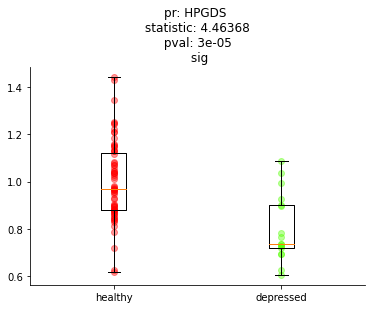

In [76]:
from scipy import stats
x = []
y = []
n = 0
y = 0
for k in prs_to_plot:#,'EGF','HPGDS']:#pr_dic.keys():
    c = pr_dic[k]
    ax = plt.subplot(111)
    if not c in healthy_NPX.columns:
        print(k)
        n = n +1
        continue
    y = y +1
    l1 = healthy_mean_NPX[c].values.tolist()
    l2 = depressed_mean_NPX[c].values.tolist()
    vals=[l1,l2]
    x1 = [1 for i in l1]
    x2 = [2 for i in l2]
    xs = [x1,x2]
    names = ['healthy', 'depressed']
    #plt.savefig('test.pdf')
    ax.boxplot(vals, labels=names, showfliers=False)
    ngroup = len(vals)
    clevels = np.linspace(0., 1., ngroup)

    for x, val, clevel in zip(xs, vals, clevels):
        ax.scatter(x, val, c=cm.prism(clevel), alpha=0.4)
    #print(names), print(vals), print(xs)
    statistic, pval = stats.ttest_ind(l1,l2)
    #r, p, lo, hi = pearsonr_ci(l1,l2) #stats.ttest_ind(l1,l2)
    if pval < 0.05:
        sig = 'sig'
    else:
        sig = 'NOT sig'
    plt.title('pr: %s \n statistic: %s \n pval: %s \n %s' %(k, round(statistic,5), round(pval,5), sig))
    k_s = str(k).replace("/", " ")
    #plt.ylim(ymax = 3, ymin = 0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #plt.savefig('healthy_dep_test/'+  k_s +'_0.pdf', bbox_inches="tight")
    #plt.close()
plt.show()